In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.random_struct_search import Random_Searcher
from classes.optimizers.md_simulator import MD_Simulator
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
frozens = [True for i in range(5)] + [False for i in range(2)]
colors = ["C1" for i in range(5)] + ["C0" for i in range(2)]
poss = [np.array([-2.0+i, 0.0]) for i in range(5)] + [np.array([-0.5,1.0]), np.array([0.5,1.0])]

atom_list = []
for color, frozen, pos in zip(colors, frozens, poss):
    atom = Atom(position=pos, color=color, frozen=frozen, size=60)
    atom_list.append(atom)
atom_col = Atom_Collection(atomlist=atom_list)
atom_col.calculator = LennardJones()
print(atom_col.get_forces())
rand_searcher = Random_Searcher(atom_col=atom_col, step_size=0.1)
atom_rel = rand_searcher.line_search(atom_col=atom_col, fmax=0.1)

[[  1.32982908   0.54378993]
 [  7.26856191  12.51521795]
 [  0.          23.986176  ]
 [ -7.26856191  12.51521795]
 [ -1.32982908   0.54378993]
 [  0.05414995 -25.05209588]
 [ -0.05414995 -25.05209588]]


In [3]:
print(atom_rel.get_forces())
atom_rel.rattle_atoms(delta=0.05)
print(atom_rel.get_forces())


[[ 1.63016452e+00  6.40701825e-01]
 [ 1.20614983e+00  4.83842090e-04]
 [ 0.00000000e+00 -1.27716113e+00]
 [-1.20614983e+00  4.83842090e-04]
 [-1.63016452e+00  6.40701825e-01]
 [ 8.12879861e-03 -2.60510442e-03]
 [-8.12879861e-03 -2.60510442e-03]]
[[  1.46523255   0.56061132]
 [  7.10592973   9.92180593]
 [-17.88868934 -20.44435158]
 [  0.780691    -2.94105384]
 [ -1.57924812   0.57609088]
 [-42.30125144 -13.10655361]
 [ 52.41733562  25.4334509 ]]


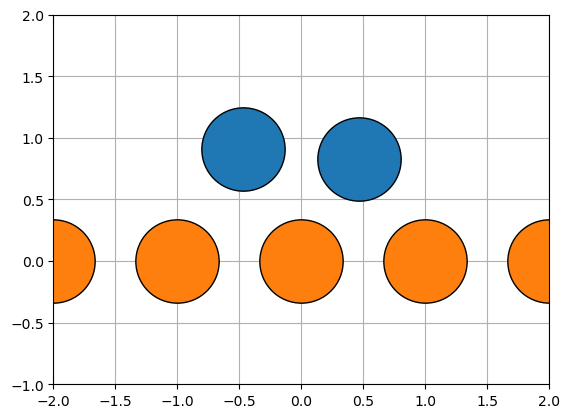

In [4]:
fig, ax = plt.subplots()
ax.set_xlim([-2,2])
ax.set_ylim([-1,2])
atom_rel.plot(ax=ax)
ax.grid()
atom_rel.reset_plot_axes()


In [5]:
md_simulator = MD_Simulator(atom_col=atom_rel)
#atom_rel.rattle_atoms(delta=1.0)
print(atom_rel.get_forces())
md_atoms = md_simulator.run_N2_integration(atom_col=atom_rel, N_steps=10000, t_init=0.0)

[[  1.46523255   0.56061132]
 [  7.10592973   9.92180593]
 [-17.88868934 -20.44435158]
 [  0.780691    -2.94105384]
 [ -1.57924812   0.57609088]
 [-42.30125144 -13.10655361]
 [ 52.41733562  25.4334509 ]]


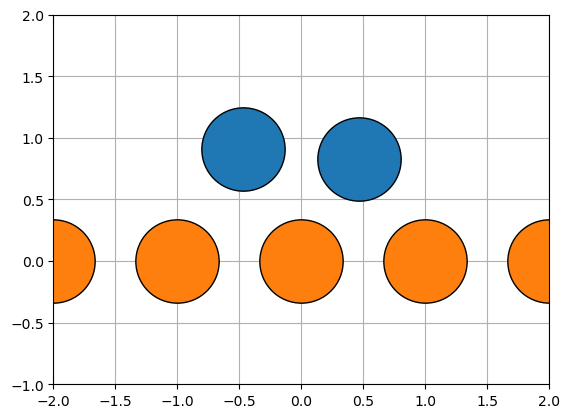

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([-2,2])
ax.set_ylim([-1,2])
ax.grid()
atom_rel.plot(ax=ax)
positions = [md_atom.get_positions() for md_atom in md_atoms]

In [7]:
def update(i):
    if i == 0:
        plot_elem = atom_rel.plot(ax=ax)
    else:
        pos = positions[100*i]
        atom_rel.set_positions(pos)
        plot_elem = atom_rel.plot(ax=ax)
    return plot_elem

In [8]:
N = 49

anim = animation.FuncAnimation(fig,
                               update,
                               frames=N,
                               interval=75,
                               blit=True)
anim

In [9]:
print(positions)

[array([[-2.        ,  0.        ],
       [-1.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [-0.47746546,  0.90662277],
       [ 0.46509348,  0.83190485]]), array([[-2.        ,  0.        ],
       [-1.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [-0.47932366,  0.90594727],
       [ 0.46741023,  0.83311   ]]), array([[-2.        ,  0.        ],
       [-1.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [-0.48097289,  0.90525766],
       [ 0.46947726,  0.83425378]]), array([[-2.        ,  0.        ],
       [-1.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [-0.48244888,  0.90455847],
       [ 0.47133558,  0.83534085]]), array([[-2.

In [ ]:
atom_rel.get_forces()/atom_rel.get_masses()[:,None]